In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
riders = pd.read_pickle("clean-data/riders.pkl")
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [3]:
train = pd.read_pickle("clean-data/train.pkl")
train.head()

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993,425,1248
2,1899,265,3,Business,30,2,45565,30,2,45764,...,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455,199,619
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341,31,1021
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214,60,545


In [4]:
dropped = ["placement_date", "placement_weekday", "placement_time",
           "confirm_date", "confirm_weekday", "confirm_time",
           "arrival_pickup_date", "arrive_pickup_weekday", "arrive_time",
           "pickup_date", "pickup_weekday", "pickup_time",
           "arrival_dest_date", "arrival_dest_weekday", "arrival_dest_time"]
train.drop(columns=dropped, inplace=True)

In [5]:
train.dtypes

order_id                        int64
user_id                         int64
platform                     category
personal_or_business         category
distance                        int64
temperature                   float64
pickup_lat                    float64
pickup_long                   float64
dest_lat                      float64
dest_long                     float64
rider_id                        int64
pickup_to_arrival_time          int64
placement_to_confirm_time       int64
confirm_to_pickup_time          int64
dtype: object

In [6]:
# Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
# platform 4.

train["platform1"] = 0
train["platform2"] = 0
train["platform3"] = 0
train.loc[train.platform == 1, "platform1"] = 1
train.loc[train.platform == 2, "platform2"] = 1
train.loc[train.platform == 3, "platform3"] = 1

In [7]:
# Creating dummy variable for personal_or_business (1 if personal 0 if business)

train["personal"] = 0
train.loc[train.personal_or_business == "Personal", "personal"] = 1

In [8]:
# Standardizing numerical variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train = train.select_dtypes(include=numerics)
standardized = pd.DataFrame(scaler.fit_transform(numeric_train))
standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.212248,-1.068473,-0.971370,-8.873220e-01,-1.189424,0.509897,-0.511888,0.414159,-0.124311,-0.822409,-0.164988,1.348395,-0.335678,-0.220146,0.417505,-0.468583
1,1.379204,0.382012,1.145469,9.749159e-01,-2.294056,2.349813,-0.356757,0.070177,1.384885,0.441712,-0.008025,-0.278724,-0.335678,-0.220146,0.417505,2.134095
2,-1.495344,-1.391583,-1.147774,3.969599e-14,-0.878981,0.858136,-0.526672,0.379588,-1.110271,-1.116155,-0.228358,-0.921599,-0.335678,-0.220146,0.417505,-0.468583
3,-0.584711,-0.393277,-0.089354,-1.259770e+00,0.005523,0.563962,0.730374,-0.361289,1.381326,-0.218710,-0.392146,-0.510731,-0.335678,-0.220146,0.417505,-0.468583
4,1.686299,-0.099141,-0.089354,-2.439187e+00,0.487515,-0.510932,-0.357811,-0.031369,1.078775,-0.347351,-0.363873,-0.997232,2.979045,-0.220146,-2.395181,2.134095


In [9]:
# Running PCA

from sklearn.decomposition import PCA
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(standardized), 
                         columns = ['PC'+str(i) for i in np.arange(1,standardized.shape[1]+1)])
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.571656,0.008890,-2.115967,0.271398,0.248621,-0.188442,1.130559,-1.047784,-0.356454,-0.912906,-0.414897,0.622967,0.681599,0.437635,0.120899,-0.002552
1,0.369836,2.317969,-1.280156,0.092675,0.006460,1.005917,-1.062534,1.216400,-1.302341,0.098872,-0.643504,-2.163101,-0.589839,-0.026284,-2.093444,0.007351
2,-0.760128,-0.908211,-1.593468,-0.056561,0.070582,-0.711655,0.870340,-2.200820,-0.207412,-0.055288,-0.349951,-0.956329,-0.399791,0.210181,0.103934,-0.002030
3,-0.413675,-0.292610,-0.083650,0.003881,0.061995,0.823508,0.429542,-0.269254,-0.941953,-1.626428,0.951779,-0.026283,-0.591102,-0.055541,0.069129,-0.002216
4,4.447018,-0.526868,0.352507,0.307751,-1.946482,0.247814,-1.835119,0.081959,-0.038116,-1.810311,0.137308,0.305963,-0.334030,-0.229801,-0.108816,-0.003742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0.393232,-1.873587,-0.148223,0.293595,-0.236132,1.223034,0.702965,0.473619,-1.741041,1.223299,-0.578438,0.304401,-0.309715,-0.155797,-2.135176,0.017452
21197,-0.947588,-0.217365,-0.961372,-0.251102,-0.161894,-0.967125,-1.122010,-0.323630,0.134241,0.423121,-1.784285,-0.794041,0.133895,-0.006290,0.070154,-0.003063
21198,-1.202874,2.785345,0.641021,0.967085,0.534118,0.217105,1.799077,1.144940,-1.505178,1.042826,0.099871,-0.576414,-0.994622,-0.114939,0.075229,-0.003997
21199,4.394439,0.441482,0.604049,1.460240,-1.036476,-1.034958,0.980960,-0.509655,0.255806,-1.817089,0.258117,-0.362586,-1.795279,-0.476919,-0.131788,-0.006298


Text(0.5, 1.0, 'Scree Plot')

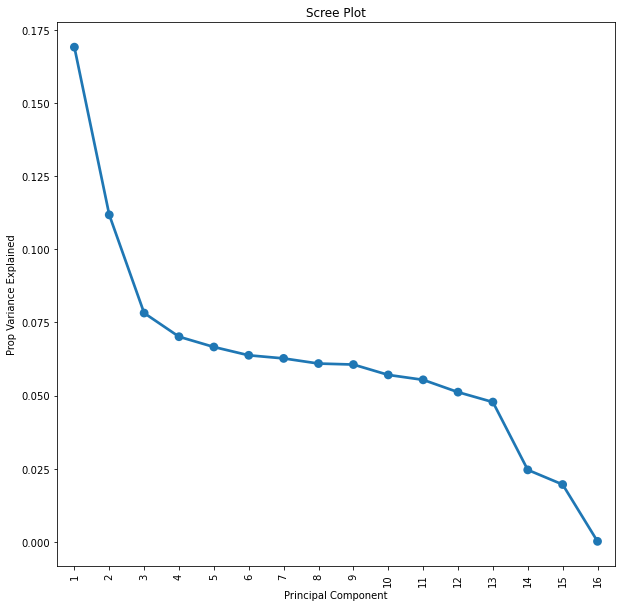

In [10]:
# Determining optimal number of components

scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Prop Variance Explained': pca.explained_variance_ratio_})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Prop Variance Explained", data=scree_data).set_title('Scree Plot')

In [11]:
scree_data.head()

,Principal Component,Prop Variance Explained
0,1,0.169076
1,2,0.111776
2,3,0.078228
3,4,0.070143
4,5,0.066632


In [12]:
y = pca.explained_variance_ratio_[:14].cumsum()
x = np.arange(15)[1:]
[x,y]

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([0.1690762 , 0.28085261, 0.35908018, 0.42922334, 0.49585497,
        0.55964669, 0.62237685, 0.68334998, 0.7439835 , 0.80107549,
        0.85648488, 0.90768741, 0.95549709, 0.98013575])]

Text(0.5, 1.0, 'Cumulative Scree Plot')

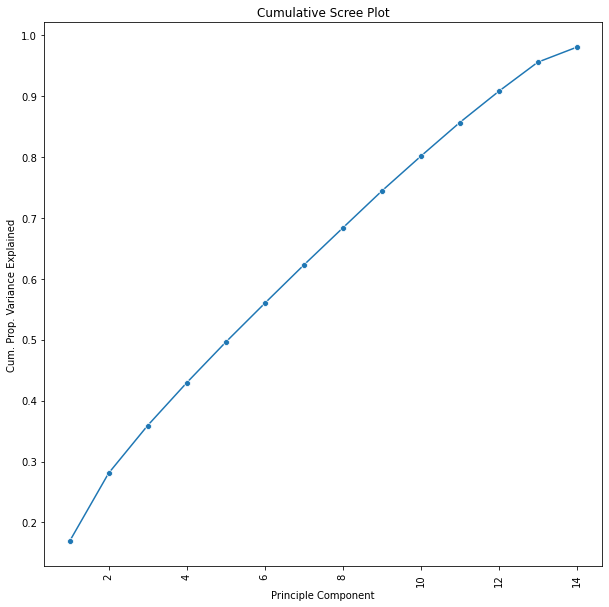

In [13]:
# cumulative variance explained

y = pca.explained_variance_ratio_[:14].cumsum()
x = np.arange(15)[1:]
cum_data = pd.DataFrame({'Principle Component':x, 'Cum. Prop. Variance Explained':y})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.lineplot(x='Principle Component', y='Cum. Prop. Variance Explained', data = cum_data, marker='o').set_title("Cumulative Scree Plot")


In [14]:
train_pcs = pc_scores.iloc[:,:14]
train_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.571656,0.008890,-2.115967,0.271398,0.248621,-0.188442,1.130559,-1.047784,-0.356454,-0.912906,-0.414897,0.622967,0.681599,0.437635
1,0.369836,2.317969,-1.280156,0.092675,0.006460,1.005917,-1.062534,1.216400,-1.302341,0.098872,-0.643504,-2.163101,-0.589839,-0.026284
2,-0.760128,-0.908211,-1.593468,-0.056561,0.070582,-0.711655,0.870340,-2.200820,-0.207412,-0.055288,-0.349951,-0.956329,-0.399791,0.210181
3,-0.413675,-0.292610,-0.083650,0.003881,0.061995,0.823508,0.429542,-0.269254,-0.941953,-1.626428,0.951779,-0.026283,-0.591102,-0.055541
4,4.447018,-0.526868,0.352507,0.307751,-1.946482,0.247814,-1.835119,0.081959,-0.038116,-1.810311,0.137308,0.305963,-0.334030,-0.229801


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

1579.3887500398878
[-0.00159219]


<AxesSubplot:xlabel='order_id', ylabel='pickup_to_arrival_time'>

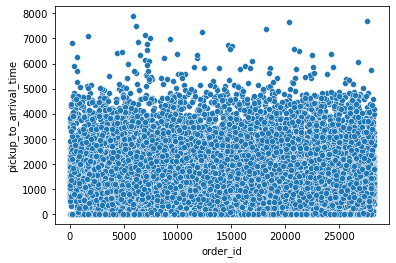

In [21]:
model.fit(X=train[["order_id"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="order_id", y="pickup_to_arrival_time", data=train)
# Order ID should not be used to predict outcome

595.6678259841947
[101.11500695]


<AxesSubplot:xlabel='distance', ylabel='pickup_to_arrival_time'>

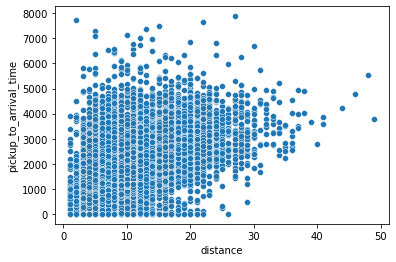

In [23]:
model.fit(X=train[["distance"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="distance", y="pickup_to_arrival_time", data=train)

1542.1226969379672
[0.03415787]


<AxesSubplot:xlabel='placement_to_confirm_time', ylabel='pickup_to_arrival_time'>

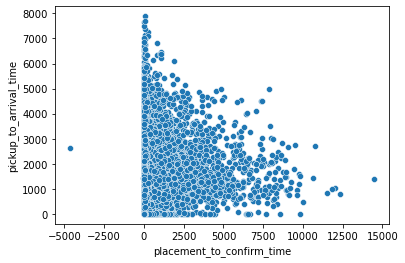

In [24]:
model.fit(X=train[["placement_to_confirm_time"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="placement_to_confirm_time", y="pickup_to_arrival_time", data=train)

1459.4224547913655
[0.06411389]


<AxesSubplot:xlabel='confirm_to_pickup_time', ylabel='pickup_to_arrival_time'>

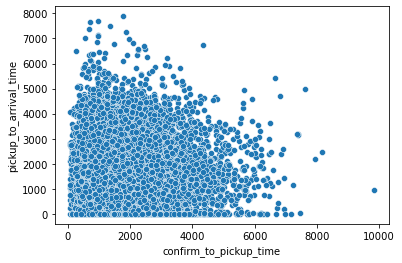

In [30]:
model.fit(X=train[["confirm_to_pickup_time"]], y=train["pickup_to_arrival_time"])
print(model.intercept_)
print(model.coef_)
sns.scatterplot(x="confirm_to_pickup_time", y="pickup_to_arrival_time", data=train)

In [26]:
train.shape

(21201, 18)

In [32]:
train[train.placement_to_confirm_time < 0]

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,platform1,platform2,platform3,personal
3173,27041,246,3,Business,3,24.0,-1.258414,36.804800,-1.255189,36.782203,875,352,-26,576,0,0,1,0
4024,2800,1402,3,Business,11,25.6,-1.225322,36.808550,-1.281754,36.832423,928,2640,-4664,2699,0,0,1,0
6805,7504,527,2,Personal,12,20.6,-1.286176,36.820909,-1.331943,36.894471,45,1456,-42,1313,0,1,0,1
10597,1271,2078,1,Personal,10,23.6,-1.233299,36.813070,-1.256730,36.784224,770,1417,-1,855,1,0,0,1
11083,4442,1411,1,Personal,3,16.2,-1.308378,36.859008,-1.315920,36.851672,329,499,-13,1279,1,0,0,1
16331,19517,393,3,Business,14,28.0,-1.317755,36.830370,-1.306378,36.751984,731,2106,-12,143,0,0,1,0


In [33]:
train.iloc[3173]

order_id                         27041
user_id                            246
platform                             3
personal_or_business          Business
distance                             3
temperature                       24.0
pickup_lat                   -1.258414
pickup_long                    36.8048
dest_lat                     -1.255189
dest_long                    36.782203
rider_id                           875
pickup_to_arrival_time             352
placement_to_confirm_time          -26
confirm_to_pickup_time             576
platform1                            0
platform2                            0
platform3                            1
personal                             0
Name: 3173, dtype: object